# QR layout
Render a small QR grid as SVG using a hand-constructed layout.

Expected output: a 3-layer QR-style grid with W, W^T, W^T A, and W^T W blocks.

Note: this is a manual layout example, not the algorithmic QR stack produced by la_figures.


In [1]:
import sympy as sym
from IPython.display import SVG, display
from matrixlayout.qr import qr_grid_svg

def build_qr_grid(A, W):
    WtW = W.T * W
    WtA = W.T * A
    S = sym.Matrix.diag(*[1 / sym.sqrt(x) for x in sym.Matrix.diagonal(WtW)])
    Qt = S * W.T
    R = S * WtA
    return [
        [None, None, A, W],
        [None, W.T, WtA, WtW],
        [S, Qt, R, None],
    ]


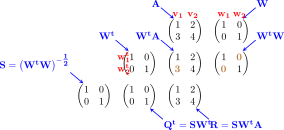

In [2]:
A = sym.Matrix([[1, 2], [3, 4]])
W = sym.eye(2)
matrices = build_qr_grid(A, W)

svg = qr_grid_svg(matrices=matrices)
display(SVG(svg))


## With array names
Enable default matrix labels on the manual grid.

Expected output: the same grid with labels on each block.


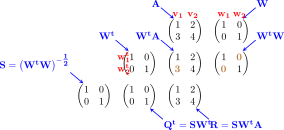

In [3]:
A = sym.Matrix([[1, 2], [3, 4]])
W = sym.eye(2)
matrices = build_qr_grid(A, W)

svg = qr_grid_svg(matrices=matrices, array_names=True)
display(SVG(svg))


## Troubleshooting
If rendering fails, set `output_dir` to capture artifacts and check `toolchain_name`.